In [218]:
#učitavanje biblioteka koje su potrebne za rad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets


In [219]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)
#ucitavanje baze podataka i pregled izgleda 
dataframe = pd.read_csv('ShanghaiPM20100101_20151231.csv')
print(dataframe)

          No  year  month  day  hour  season  PM_Jingan  PM_US Post  PM_Xuhui  \
0          1  2010      1    1     0       4        NaN         NaN       NaN   
1          2  2010      1    1     1       4        NaN         NaN       NaN   
2          3  2010      1    1     2       4        NaN         NaN       NaN   
3          4  2010      1    1     3       4        NaN         NaN       NaN   
4          5  2010      1    1     4       4        NaN         NaN       NaN   
...      ...   ...    ...  ...   ...     ...        ...         ...       ...   
52579  52580  2015     12   31    19       4      86.00       82.00     90.00   
52580  52581  2015     12   31    20       4      83.00       93.00     86.00   
52581  52582  2015     12   31    21       4      85.00       90.00     95.00   
52582  52583  2015     12   31    22       4      83.00       86.00     92.00   
52583  52584  2015     12   31    23       4        NaN       77.00       NaN   

       DEWP  HUMI    PRES  

In [220]:
print(dataframe.shape) #ovde vidimo da imamo 17 obelezja (kolona)  i 52584 uzoraka)

(52584, 17)


In [221]:
print(dataframe.sum().sum()) #broj podataka

1556193633.8


C:\Users\Svetlana\AppData\Local\Temp\ipykernel_12060\1551544362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dataframe.sum().sum()) #broj podataka


In [222]:
print(dataframe.info()) #Broj obeležja bi trebalo da je 17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Jingan      24700 non-null  float64
 7   PM_US Post     34039 non-null  float64
 8   PM_Xuhui       25189 non-null  float64
 9   DEWP           52571 non-null  float64
 10  HUMI           52571 non-null  float64
 11  PRES           52556 non-null  float64
 12  TEMP           52571 non-null  float64
 13  cbwd           52572 non-null  object 
 14  Iws            52572 non-null  float64
 15  precipitation  48575 non-null  float64
 16  Iprec          48575 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

In [223]:
dataframe.head() #prikaz prvih 5 uzoraka

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.00,59.48,1026.10,1.00,cv,1.00,0.00,0.00
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.00,59.48,1025.10,1.00,SE,2.00,0.00,0.00
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.00,59.21,1025.10,0.00,SE,4.00,0.00,0.00
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.00,63.94,1024.00,0.00,SE,5.00,0.00,0.00
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.00,63.94,1023.00,0.00,SE,8.00,0.00,0.00


In [224]:
dataframe.dtypes

No                 int64
year               int64
month              int64
day                int64
hour               int64
season             int64
PM_Jingan        float64
PM_US Post       float64
PM_Xuhui         float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object

In [225]:
#PRebrojavamo koliko obelezja imamo numerickog, a koliko kategorickog tipa

numericka_obelezja = dataframe.dtypes[dataframe.dtypes != "object"].index
print("Broj numerickih obelezja: ", len(numericka_obelezja))

kategoricka_obelezja = dataframe.dtypes[dataframe.dtypes == "object"].index
print("Broj kategorickih obelezja: ", len(kategoricka_obelezja))

Broj numerickih obelezja:  16
Broj kategorickih obelezja:  1


In [226]:

# Proveravamo koliko imamo nedostajucih obelezja i koji procenat to cini
total = dataframe.isnull().sum().sort_values(ascending=False)
percent = (dataframe.isnull().sum()/len(dataframe)).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)


               Total  Percent
PM_Jingan      27884    53.03
PM_Xuhui       27395    52.10
PM_US Post     18545    35.27
precipitation   4009     7.62
Iprec           4009     7.62
PRES              28     0.05
DEWP              13     0.02
HUMI              13     0.02
TEMP              13     0.02
cbwd              12     0.02
Iws               12     0.02
season             0     0.00
hour               0     0.00
day                0     0.00
year               0     0.00
month              0     0.00
No                 0     0.00


In [227]:
#Po uslovu zadatka izbacujem navedena dva obelezja i revidiranu bazu cuvam pod nazivom Sangaj
dataframe.drop(['PM_Jingan','PM_Xuhui'], inplace=True,axis=1)
dataframe.to_csv('Sangaj.csv', index=False)
df = pd.read_csv('Sangaj.csv')
df.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,-6.00,59.48,1026.10,1.00,cv,1.00,0.00,0.00
1,2,2010,1,1,1,4,NaN,-6.00,59.48,1025.10,1.00,SE,2.00,0.00,0.00
2,3,2010,1,1,2,4,NaN,-7.00,59.21,1025.10,0.00,SE,4.00,0.00,0.00
3,4,2010,1,1,3,4,NaN,-6.00,63.94,1024.00,0.00,SE,5.00,0.00,0.00
4,5,2010,1,1,4,4,NaN,-6.00,63.94,1023.00,0.00,SE,8.00,0.00,0.00


In [228]:
#kako u sledećeim obeležjima nedostaje manje od 8 posto podataka, izbrisaću te uzorke
df2 = df.dropna(axis = 0, inplace = False)
print(df2.shape)
df2.head()

(31880, 15)


,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
17442,17443,2011,12,28,18,4,36.00,4.00,62.00,1027.10,11.00,NE,8.00,0.00,0.00
17443,17444,2011,12,28,19,4,41.00,4.00,62.00,1027.10,11.00,NE,9.00,0.00,0.00
17444,17445,2011,12,28,20,4,44.00,5.00,71.07,1028.10,10.00,NE,11.00,0.00,0.00
17445,17446,2011,12,28,21,4,40.00,5.00,71.07,1028.10,10.00,NE,13.00,0.00,0.00
17446,17447,2011,12,28,22,4,25.00,6.00,76.18,1028.10,10.00,NE,15.00,0.00,0.00


In [229]:
df2['precipitation'].unique() #proveravala sam da li su okje vrednosti jer mi
#je bilo nelogicno da je mean 0.16, median 0, a max 61.6

array([ 0. ,  0.1,  0.3,  0.2,  0.5,  1. ,  2.5,  3.3,  2.1,  1.9,  0.8,
        0.9,  0.6,  1.1,  1.3,  0.4,  1.2,  0.7,  1.5,  1.4,  4. ,  2.7,
        2.2,  1.8,  2.6,  2.4,  3.5,  6.2,  1.6,  3.1,  5.3,  2.3,  2. ,
        3.8,  1.7,  2.9,  4.1,  7.1,  9.9, 16.7,  6.5,  4.6,  4.2,  4.3,
        9.6,  3.6,  3. ,  8.5,  7.5,  5.2, 23.5,  3.9,  5.9,  5.1, 41.1,
        4.9,  4.8, 15.3, 10.8,  9.7,  2.8,  9.2,  4.4,  5. ,  5.6,  4.7,
       13.5,  9.5, 20.1, 12.1, 24.1, 12.6,  5.8, 38.3, 20. ,  7. , 38.1,
        7.9,  6.4,  3.4,  4.5,  3.7,  7.4,  5.7,  8.3,  6. , 10.5,  6.3,
        7.6,  6.9, 17.5,  9.8,  6.1, 11.9,  8.1,  9.1, 20.9, 44.7,  8. ,
       61.6, 11.1,  8.7, 15.7, 13.2,  8.8, 11.3, 14.6, 11.5, 17.4, 18.9,
        3.2,  7.3,  8.2,  8.6,  6.6, 19.6, 27.8, 27.1,  9. , 10.1,  5.4,
        5.5, 10.9, 16. , 10.6, 29.2, 10.4, 11.2, 12.8,  6.8, 20.3,  6.7,
       18.5, 17.6,  8.4,  7.2,  7.8, 15.1, 19.2, 20.5, 24. ,  9.3, 16.3,
       13.7, 17. , 23.1, 15.4, 14.9])

In [230]:
df2['cbwd'].unique()

array(['NE', 'NW', 'cv', 'SE', 'SW'], dtype=object)

In [231]:
#uviđamo da imamo 5 karakterističnih smerova vetra i nan vrednost
#cv - mirno i bez vetra
#kako bismo mogli vrsiti linearnu regresiju, moramo da kategoriske predstavimo numericki
df2.loc[df2['cbwd']=='cv','cbwd']=1
df2.loc[df2['cbwd']=='SW','cbwd']=2
df2.loc[df2['cbwd']=='SE','cbwd']=3
df2.loc[df2['cbwd']=='NW','cbwd']=4
df2.loc[df2['cbwd']=='NE','cbwd']=5


In [232]:
#Koristeci metodu forward filla, nedostajucim podacima dodeljujem vrednost od ranije 
df2['PM_US Post'].fillna(method='ffill', inplace=True)
#proveravam nedostajuce podatke sada
print(df2.isnull().sum())


No               0
year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64


C:\Users\Svetlana\AppData\Local\Temp\ipykernel_12060\3973796766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PM_US Post'].fillna(method='ffill', inplace=True)


In [233]:
df2.describe() #funkciom describe vidimo statističke osobine parametara

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00,31880.00
mean,34368.95,2013.43,6.42,15.75,11.58,2.51,53.41,11.02,69.43,1016.14,17.23,50.73,0.15,1.01
std,9878.74,1.11,3.50,8.80,6.88,1.14,43.06,9.69,17.78,8.98,9.23,72.43,1.08,7.43
min,17443.00,2011.00,1.00,1.00,0.00,1.00,1.00,-17.00,13.09,990.00,-4.00,0.00,0.00,0.00
25%,25928.75,2012.00,3.00,8.00,6.00,1.00,26.00,3.00,57.51,1008.10,9.00,6.00,0.00,0.00
50%,34148.50,2013.00,6.00,16.00,12.00,3.00,42.00,12.00,72.04,1016.00,18.00,21.00,0.00,0.00
75%,42929.25,2014.00,9.00,23.00,18.00,4.00,67.00,19.00,83.25,1023.00,24.00,65.00,0.00,0.00
max,52584.00,2015.00,12.00,31.00,23.00,4.00,730.00,28.00,100.00,1040.00,41.00,691.00,61.60,226.40


In [234]:
df2.tail() #kako bih videla koji su poslednji uzorci - do kada dosežu

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
52579,52580,2015,12,31,19,4,82.00,-1.00,65.13,1035.00,5.00,5,15.00,0.00,0.00
52580,52581,2015,12,31,20,4,93.00,1.00,70.27,1035.00,6.00,5,19.00,0.00,0.00
52581,52582,2015,12,31,21,4,90.00,1.00,70.27,1036.00,6.00,5,22.00,0.00,0.00
52582,52583,2015,12,31,22,4,86.00,0.00,70.06,1035.00,5.00,5,25.00,0.00,0.00
52583,52584,2015,12,31,23,4,77.00,0.00,70.06,1035.00,5.00,5,27.00,0.00,0.00


In [235]:
#Provera koje godine se javljaju u bazi
df2['year'].unique()

array([2011, 2012, 2013, 2014, 2015], dtype=int64)

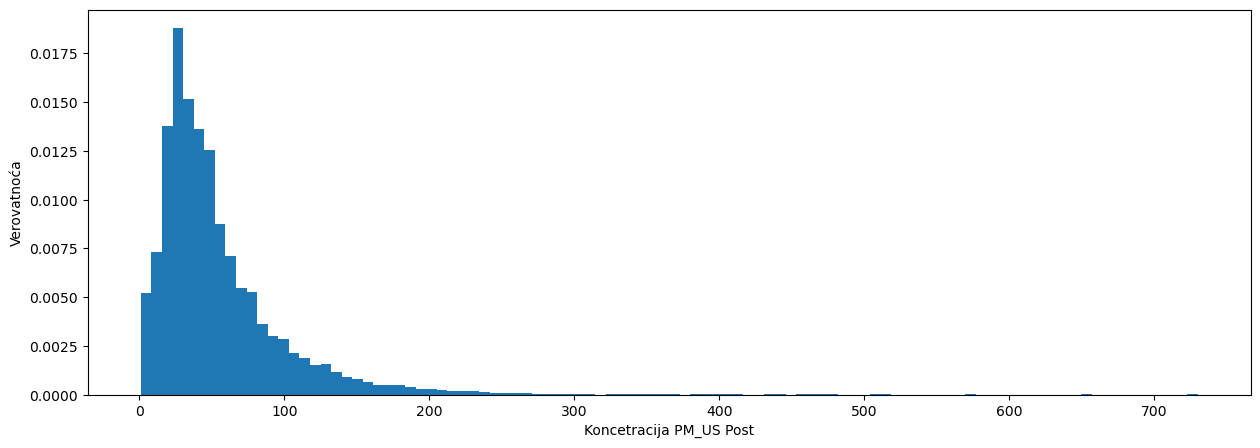

In [236]:
#iscrtavam izlaz kako bih proverila raspodelu koncetracije čestice PM_US Post u vazduhu
plt.figure(figsize = (15,5))
plt.hist(df2['PM_US Post'], density = True, bins = 100)
plt.xlabel('Koncetracija PM_US Post')
plt.ylabel('Verovatnoća')
plt.show()


In [237]:
print(df2['year'].unique())
df_godina = df2.set_index('year')
df_godina.head()
# postaviti godinu za indeks zbog lakšeg pretraživanja pomoću df.loc[]


[2011 2012 2013 2014 2015]


,No,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year,,,,,,,,,,,,,,
2011,17443,12,28,18,4,36.00,4.00,62.00,1027.10,11.00,5,8.00,0.00,0.00
2011,17444,12,28,19,4,41.00,4.00,62.00,1027.10,11.00,5,9.00,0.00,0.00
2011,17445,12,28,20,4,44.00,5.00,71.07,1028.10,10.00,5,11.00,0.00,0.00
2011,17446,12,28,21,4,40.00,5.00,71.07,1028.10,10.00,5,13.00,0.00,0.00
2011,17447,12,28,22,4,25.00,6.00,76.18,1028.10,10.00,5,15.00,0.00,0.00


([<matplotlib.axis.XTick at 0x1c4aeab2f70>,
 [Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015')])

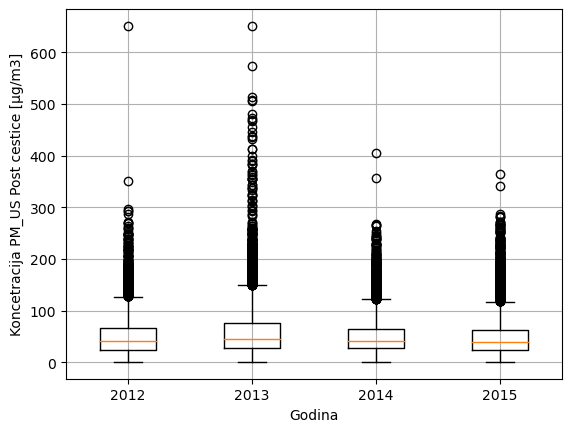

In [238]:
#kako imamo samo jedan mesec u 2011, ne unosim u analizu
plt.boxplot([df_godina.loc[2012,'PM_US Post'], df_godina.loc[2013,'PM_US Post'], df_godina.loc[2014,'PM_US Post'], df_godina.loc[2015,'PM_US Post']])
plt.xlabel('Godina')
plt.ylabel('Koncetracija PM_US Post cestice [μg/m3]')
plt.grid()
plt.xticks([1,2,3,4],['2012','2013','2014','2015'])

In [239]:
#kako ću koristiti scatter metodu, potrebno mi je da grupišem mesece
#prvo zbog lakšeg pretraživanja postavljam mesece kao prvo obelešje
#potom kreiram postavljam petrlju kako ne bih se bak

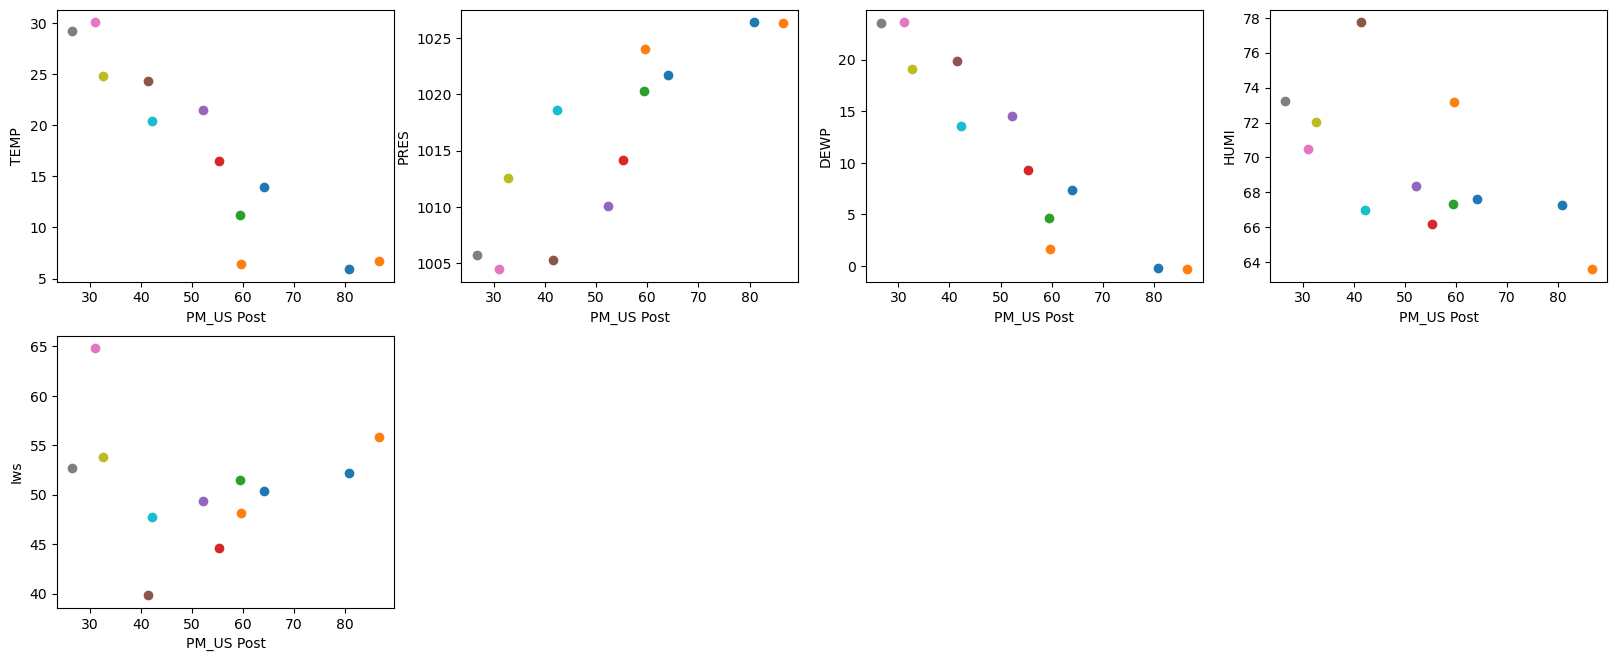

In [240]:
meseci = df2.groupby(by=['month']).mean()
PM25_mesec = []
TEMP_mesec = []
PRES_mesec = []
DEWP_mesec = []
HUMI_mesec = []
Iws_mesec = []
for i in range(1, np.shape(meseci)[0]+1):
    PM25_mesec.append(meseci.loc[i]['PM_US Post'])
    TEMP_mesec.append(meseci.loc[i]['TEMP'])
    PRES_mesec.append(meseci.loc[i]['PRES'])
    DEWP_mesec.append(meseci.loc[i]['DEWP'])
    HUMI_mesec.append(meseci.loc[i]['HUMI'])
    Iws_mesec.append(meseci.loc[i]['Iws'])
    
mesec = ['januar', 'februar', 'mart', 'april', 'maj', 'jun', 'jul', 'avgust', 'sep', 'okt', 'nov', 'dec']
plt.figure(figsize=(20,12))
for i in range(0, len(PM25_mesec)):
    plt.subplot(3, 4, 1)
    plt.scatter(PM25_mesec[i],TEMP_mesec[i])
    plt.xlabel('PM_US Post')
    plt.ylabel('TEMP')
    
    plt.subplot(3, 4, 2)
    plt.scatter(PM25_mesec[i],PRES_mesec[i])
    plt.xlabel('PM_US Post')
    plt.ylabel('PRES')
    
    plt.subplot(3, 4, 3)
    plt.scatter(PM25_mesec[i],DEWP_mesec[i])
    plt.xlabel('PM_US Post')
    plt.ylabel('DEWP')
    
    plt.subplot(3, 4, 4)
    plt.scatter(PM25_mesec[i],HUMI_mesec[i])
    plt.xlabel('PM_US Post')
    plt.ylabel('HUMI')
    
    plt.subplot(3, 4, 5)
    plt.scatter(PM25_mesec[i],Iws_mesec[i])
    plt.xlabel('PM_US Post')
    plt.ylabel('Iws')

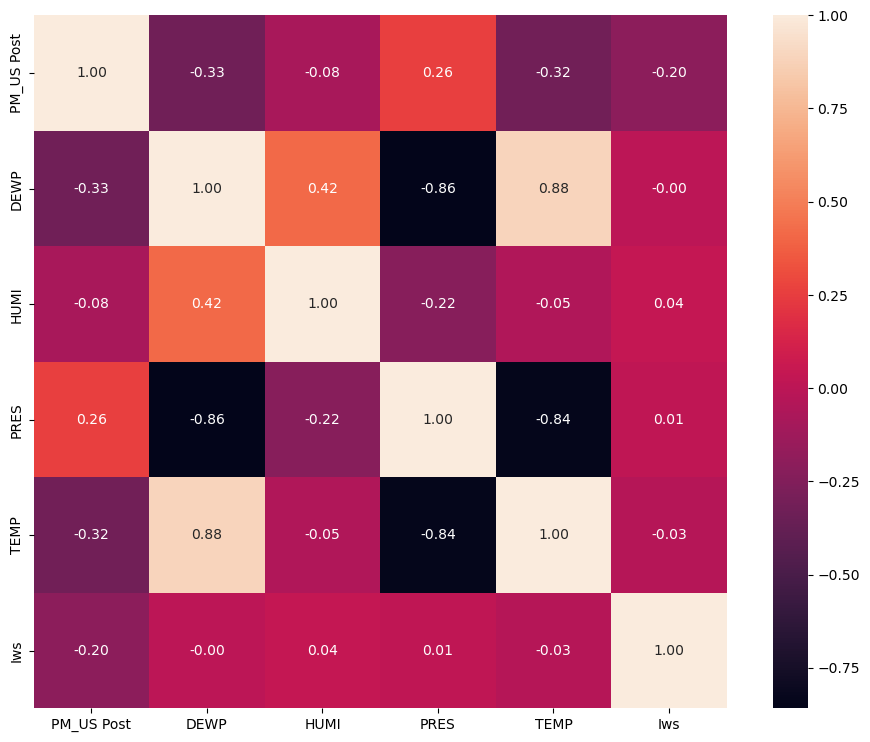

In [241]:
f = plt.figure(figsize=(12, 9))
kolone = ['PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP','Iws']
cm = df2[kolone].corr()
sns.heatmap(cm, annot=True, square=True, fmt='.2f', yticklabels=kolone, xticklabels=kolone);
plt.show()

(-0.5, 4.5, 0.0, 400.0)

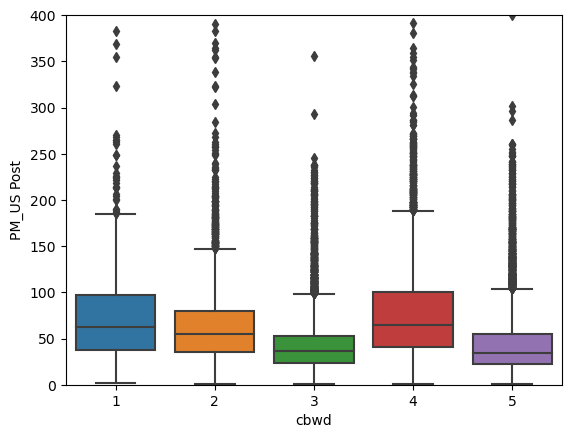

In [242]:
fig = sns.boxplot(x='cbwd',y='PM_US Post', data = df2)
fig.axis(ymin=0,ymax=400)

In [243]:
#plt.figure()
   #BOKSPLOTOBI


In [244]:
#Drugi deo zadatka

In [245]:
#kreiram funkciju pomocu koje kasnije mogu da proveravam kakav mi je model linearne regresije 
#ovim olaksavam sebi posao jer ne moram za svaku funkciju regresije da pozicam pojedinacno
#vec samo onu koju sada definisem
#mse,mae i rmse treba da budu što manje, a r2 je bitno da bude pozitivno i po mogućnosti što bliže jedinici

In [246]:
def evaluacija_modela(y, y_predvidjeno, broj_uzoraka, broj_obelezja):
    mse = mean_squared_error(y_test, y_predvidjeno) 
    mae = mean_absolute_error(y_test, y_predvidjeno) 
    rmse = np.sqrt(mse)
    #r kvadrat score gleda sumu kvatrada razlike izmedju pravih  ipredvidjenih vr
    r2 = r2_score(y_test, y_predvidjeno)
    r2_adj = 1-(1-r2)*(broj_uzoraka-1)/(broj_uzoraka-broj_obelezja-1)

    #prikaz vrednosti
    print('Mere uspešnosti:')
    print('Srednja kvadratna greška: ', mse)
    print('Srednja apsolutna greška: ', mae)
    print('Koren srednje kvadratne greške: ', rmse)
    print('R kvadrat skor: ', r2)
    print('Prilagođeni R kvadrat skor: ', r2_adj)
    

    #Uporedni prikaz nekoliko pravih i predviđenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predvidjeno)], axis=1)
    res.columns = ['Prave vrednosti', 'Predviđene vrednosti']
    print(res.head(8))

In [247]:
#x je matrica obelezja koju cu koristiti za obuku i test
#kako obelezja godina, mesec, dan, sat ne uticu na koncentraciju, uklanjam ih
#uklanjam obelezje koje ce biti izlaz i postavljam na y
x = df2.drop(['year','month','day','hour','PM_US Post','cbwd'],axis=1)
#izbacujem obelezje koje ce biti izlaza
#jedna izlazna - univarijantna 
y = df2['PM_US Post']


#podela podataka na podatke za obuku i test
#x_obuka, X_test1, y_train, Y_Test1 = train_test_split(x, y, train_size=0.7, random_state=42)
#izdvajanje deela iz podataka za obuku za validaciju
#X_val, x_test, y_val, y_test = train_test_split(X_Test1, Y_Test1, test_size=0.5, random_state=42)
# p o del a poda taka na p o d a tke za obuku i t e s t
x_obuka , x_test1 , y_obuka , y_test1 = train_test_split(x, y , test_size =0.3 , random_state =42 )
# i z d v a j a n j e d e l a i z poda taka za obuku za v a l i d a c i j u
x_val , x_test , y_val , y_test = train_test_split(x_test1 ,y_test1, test_size =0.5 , random_state =42)


print("obuka shape: {}".format(x_obuka.shape))
print("test shape: {}".format(x_test.shape))
print("val shape: {}".format(x_val.shape))


obuka shape: (22316, 9)
test shape: (4782, 9)
val shape: (4782, 9)


In [248]:
numeric_feats = [item for item in x.columns if 'wdir' not in item]


In [249]:
#inicijalizujemo klasu Standardscaler

# standardizacijom/normalizacijom ubrzavamo konvergenciju, ne poboljsavamo linearnu regresiju!

scaler = StandardScaler() #inicijalizujem klasu StandardScaler
scaler.fit(x_obuka[numeric_feats]) #racunam srednje vrednosti i standardne devijacije
#parametri za standardizaciju iskljucivo na trening uzorcima
#test uzorci ne treba na bilo koji način da utiču na bilo koji nacin na nas model pri obuci!

#preskaliramo vrednosti 
x_obuka_std = scaler.transform(x_obuka[numeric_feats])
x_test_std = scaler.transform(x_test[numeric_feats])
x_val_std = scaler.transform(x_val[numeric_feats])

#za ispis tabele, jer ovako ne bi bilo u DataFrame#
x_obuka_std = pd.DataFrame(x_obuka_std)
x_test_std = pd.DataFrame(x_test_std)
x_val_std = pd.DataFrame(x_val_std)

x_obuka_std.columns = list(x.columns) 
x_test_std.columns = list(x.columns)
x_val_std.columns = list(x.columns)

x_obuka_std.head()

#sada uočavamo su nam sve vrednosti oko nule

,No,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
0,-0.30,-0.45,1.34,-0.74,-1.35,1.82,-0.55,-0.13,-0.14
1,-0.20,0.43,1.14,1.08,-0.91,0.74,-0.63,-0.13,-0.14
2,-1.03,0.43,0.52,-0.03,0.32,0.52,-0.11,-0.13,-0.14
3,1.54,-0.45,1.14,-0.39,-1.02,1.39,-0.35,-0.04,-0.12
4,1.23,-1.33,-0.72,-2.52,0.21,0.95,-0.63,-0.13,-0.14


Mere uspešnosti:
Srednja kvadratna greška:  1585.8236301338047
Srednja apsolutna greška:  27.189138517252466
Koren srednje kvadratne greške:  39.82240110959916
R kvadrat skor:  0.17070118991396388
Prilagođeni R kvadrat skor:  0.1703665853550661
   Prave vrednosti  Predviđene vrednosti
0             8.00                 30.52
1            81.00                 75.99
2            71.00                 39.90
3            49.00                 42.20
4            19.00                 44.98
5            44.00                 39.89
6            33.00                 67.43
7            24.00                 56.75
Koeficijenti:  [ -0.50529319   4.10591978   3.67046419  -7.7577563   -9.89601185
 -23.68842395  -8.6148607   -0.83880664  -2.79423062]


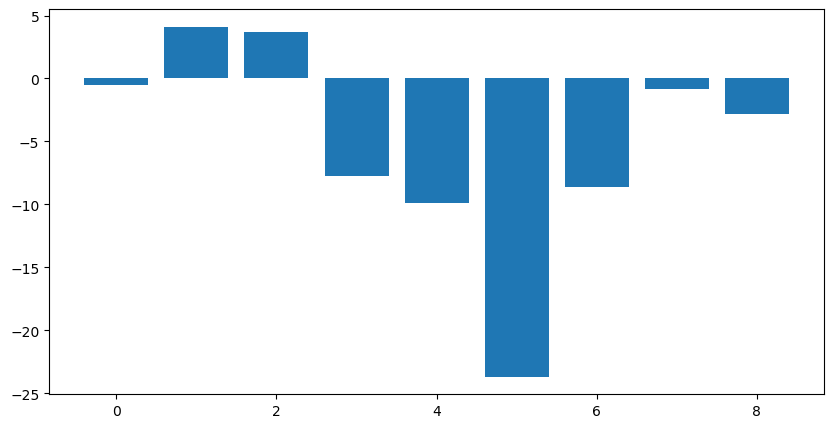

In [250]:
#Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
#Inicijalizacija
regression_model = LinearRegression(fit_intercept=True)

#Obuka trening uzoraka, prosledjujemo obelezja uzoraka i zeljene izrede
regression_model.fit(x_obuka_std, y_obuka)

#Testiranje, prosledjujemo test uzorke i vrsimo predvidjanje test uzoraka 
y_predvidjeno = regression_model.predict(x_test_std)

#Evaluacija, poredimo prave i predvidjene vrednosti
evaluacija_modela(y_test, y_predvidjeno, x_obuka_std.shape[0], x_test_std.shape[1])

#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model.coef_)),regression_model.coef_)
print("Koeficijenti: ", regression_model.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1480.0639086562794
Srednja apsolutna greška:  26.2397682392565
Koren srednje kvadratne greške:  38.47159872758448
R kvadrat skor:  0.22600772559028115
Prilagođeni R kvadrat skor:  0.22444375377400638
   Prave vrednosti  Predviđene vrednosti
0             8.00                 33.16
1            81.00                 73.26
2            71.00                 29.51
3            49.00                 44.38
4            19.00                 41.39
5            44.00                 30.06
6            33.00                 70.66
7            24.00                 52.05
Koeficijenti:  [-5.80721173e-01  1.94033402e+00  1.66881779e+02 -7.65293123e+01
 -9.40339893e+00 -1.71324318e+02 -8.10455559e+00 -5.15148105e+00
 -2.71845109e+00  4.00127636e+00  8.97677703e+00 -4.92365166e+00
 -2.77879658e+00 -9.98473301e+00  6.00517102e-01  2.99924621e-01
 -3.45753900e-01  2.92903052e+00 -4.64176005e+00 -1.05505078e+00
 -1.09836951e+01 -9.73081707e-01 -2.44085922e+0

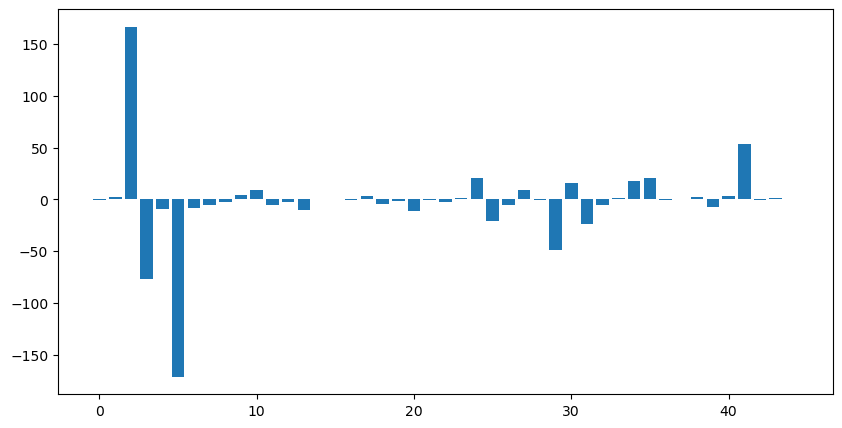

In [251]:
#Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...
#medjusobna interakcija 
poly = PolynomialFeatures(interaction_only=True, include_bias=False) 
x_interakcije_train = poly.fit_transform(x_obuka_std) 
x_interakcije_test = poly.transform(x_test_std)

#Inicijalizacija
regression_model_interakcije = LinearRegression()

#Obuka
regression_model_interakcije.fit(x_interakcije_train, y_obuka)

#Testiranje
y_predvidjeno = regression_model_interakcije.predict(x_interakcije_test) #jer sam i obučavala sa standardizovanim podacima

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_interakcije_train.shape[0], x_interakcije_test.shape[1])

#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_interakcije.coef_)),regression_model_interakcije.coef_)
print("Koeficijenti: ", regression_model_interakcije.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1454.9062882403282
Srednja apsolutna greška:  25.923834069173918
Koren srednje kvadratne greške:  38.143233846126996
R kvadrat skor:  0.23916378171096353
Prilagođeni R kvadrat skor:  0.2373181702924465
   Prave vrednosti  Predviđene vrednosti
0             8.00                 29.50
1            81.00                 74.66
2            71.00                 30.46
3            49.00                 42.90
4            19.00                 42.93
5            44.00                 27.64
6            33.00                 73.05
7            24.00                 53.83
Koeficijenti:  [-5.54391259e-01  5.49187710e+00 -7.17765567e+02  2.91088826e+02
 -8.53037586e+00  6.38579368e+02 -1.23605438e+01 -4.56197521e+00
 -6.64754655e+00 -2.21813202e+00  3.95677798e+00  1.33783503e+01
 -6.64068310e+00 -1.82872968e+00 -1.21769515e+01  1.64607548e+00
  2.21172422e-01 -4.72438436e-02  7.28542775e+00  8.14212498e-01
 -3.29544467e+00 -1.31683389e+00 -6.48412227e

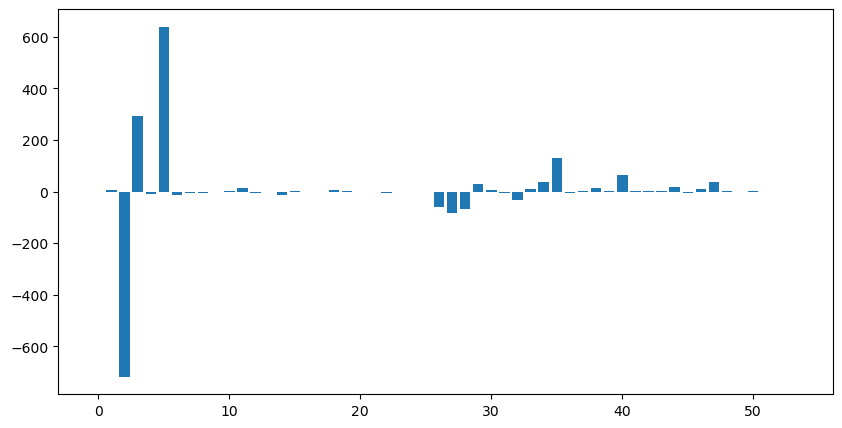

In [252]:
#Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False) #ne gledam interakciju nego stepen obeležja
x_interakcije2_train = poly.fit_transform(x_obuka_std)
x_interakcije2_test = poly.transform(x_test_std)

#Inicijalizacija
regression_model_stepen = LinearRegression()

#Obuka modela
regression_model_stepen.fit(x_interakcije2_train, y_obuka)

#Testiranje
y_predvidjeno = regression_model_stepen.predict(x_interakcije2_test)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_interakcije2_train.shape[0], x_interakcije2_train.shape[1])

#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_stepen.coef_)),regression_model_stepen.coef_)
print("Koeficijenti: ", regression_model_stepen.coef_)

In [253]:
import statsmodels.api as sm
X = sm.add_constant(x_obuka)
model = sm.OLS(y_obuka, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     514.9
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:07:56   Log-Likelihood:            -1.1328e+05
No. Observations:               22316   AIC:                         2.266e+05
Df Residuals:                   22306   BIC:                         2.267e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1242.6215     69.670     17.836      0.000    1106.064    1379.179
No            -5.108e-05   2.67e-05     -1.913      0.056      -0.000    1.26e-06
season            3.6110      0.278     12.993      0.000       3.066       4.156
DEWP              0.3789      0.308      1.232      0.218      -0.224       0.982
HUMI             -0.4337      0.080     -5.417      0.000      -0.591      -0.277
PRES             -1.1020      0.067    -16.555      0.000      -1.233      -0.972
TEMP             -2.5746      0.304     -8.476      0.000      -3.170      -1.979
Iws              -0.1178      0.004    -33.023      0.000      -0.125      -0.111
precipitation    -0.7734      0.262     -2.947      0.003      -1.288      -0.259
Iprec            -0.3789      0.039     -9.732      0.000      -0.455      -0.303
==============================================================================
Omnibus:                    14002.357   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           314524.240
Skew:                           2.637   Prob(JB):                         0.00
Kurtosis:                      20.619   Cond. No.                     9.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mere uspešnosti:
Srednja kvadratna greška:  1585.8211552716439
Srednja apsolutna greška:  27.189212519300018
Koren srednje kvadratne greške:  39.82237003584347
R kvadrat skor:  0.17070248413118072
Prilagođeni R kvadrat skor:  0.17036788009447223
   Prave vrednosti  Predviđene vrednosti
0             8.00                 30.53
1            81.00                 75.98
2            71.00                 39.91
3            49.00                 42.20
4            19.00                 44.99
5            44.00                 39.89
6            33.00                 67.44
7            24.00                 56.77
Koeficijenti:  [ -0.50599073   4.10594672   3.49961012  -7.67531404  -9.88601241
 -23.52443124  -8.61365933  -0.83946907  -2.79540588]


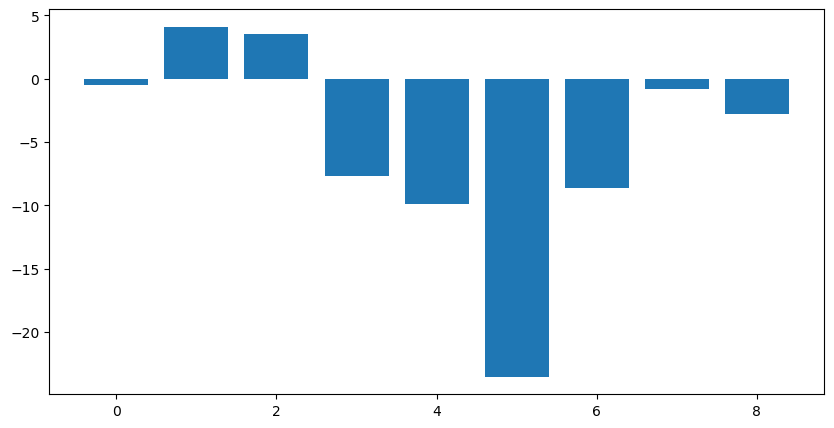

In [254]:
#Ridge regresija
#alfa određuje koliki je uticaj regularizacionog dela

#Inicijalizacija
ridge_model = Ridge(alpha = 1)

#Obuka modela
ridge_model.fit(x_obuka_std, y_obuka)

#Testiranje
y_predvidjeno = ridge_model.predict(x_test_std)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_obuka_std.shape[0], x_test_std.shape[1])


#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("Koeficijenti: ", ridge_model.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1609.0600898270625
Srednja apsolutna greška:  27.503319282519495
Koren srednje kvadratne greške:  40.11309125244603
R kvadrat skor:  0.15854979551671622
Prilagođeni R kvadrat skor:  0.15821028812676063
   Prave vrednosti  Predviđene vrednosti
0             8.00                 32.52
1            81.00                 69.52
2            71.00                 42.43
3            49.00                 43.06
4            19.00                 47.44
5            44.00                 39.53
6            33.00                 66.34
7            24.00                 68.55
Koeficijenti:  [-0.03928969  1.52897083 -7.40864895 -0.         -0.         -5.50497194
 -7.59451273 -0.08618263 -1.93467936]


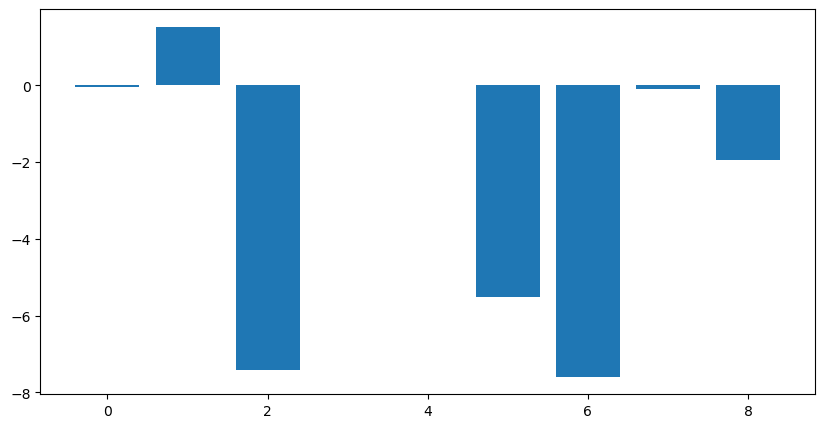

In [255]:
#Lasso regresija

#Inicijalizacija
lasso_model = Lasso(alpha = 1)

#Obuka modela
lasso_model.fit(x_obuka_std, y_obuka)

#Testiranje
y_predvidjeno = lasso_model.predict(x_test_std)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_obuka_std.shape[0], x_test_std.shape[1])

#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("Koeficijenti: ", lasso_model.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1480.7478662782285
Srednja apsolutna greška:  26.269950645093623
Koren srednje kvadratne greške:  38.48048682486006
R kvadrat skor:  0.225650053254434
Prilagođeni R kvadrat skor:  0.22408535870555435
   Prave vrednosti  Predviđene vrednosti
0             8.00                 32.76
1            81.00                 73.41
2            71.00                 29.02
3            49.00                 43.66
4            19.00                 40.41
5            44.00                 30.17
6            33.00                 70.86
7            24.00                 50.54
Koeficijenti:  [-5.53516558e-01  1.95711882e+00  3.36311028e+01 -2.08782971e+01
 -9.40012803e+00 -5.03563119e+01 -8.13689327e+00 -4.41719103e+00
 -7.07850015e+00  3.99084705e+00  8.16824005e+00 -4.50312332e+00
 -2.73380099e+00 -9.22347975e+00  6.05898253e-01  2.79105213e-01
 -3.54997890e-01 -4.63942620e-01 -3.01303701e+00 -9.93662704e-01
 -7.90096219e+00 -9.54859191e-01 -2.43318483e+0

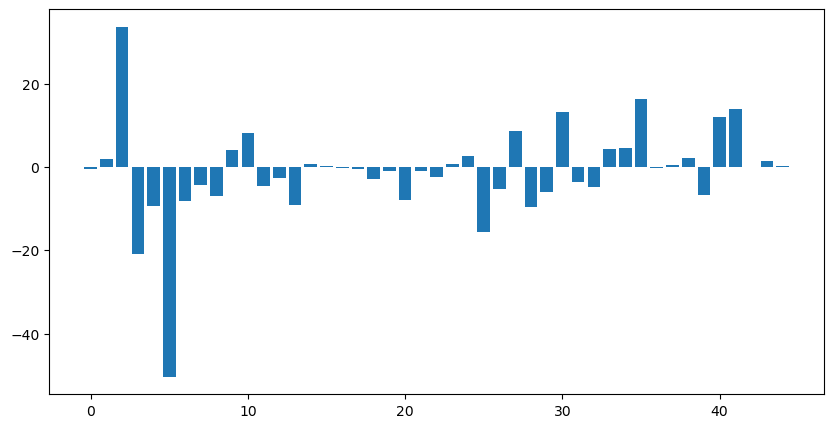

In [256]:
#Ridge regresija
#alfa određuje koliki je uticaj regularizacionog dela

#Inicijalizacija
ridge_model = Ridge(alpha = 1)

#Obuka modela
ridge_model.fit(x_interakcije_train, y_obuka)

#Testiranje
y_predvidjeno = ridge_model.predict(x_interakcije_test)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_interakcije_train.shape[0], x_interakcije_test.shape[1])


#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("Koeficijenti: ", ridge_model.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1536.7309966164496
Srednja apsolutna greška:  26.736556372893034
Koren srednje kvadratne greške:  39.201160653945564
R kvadrat skor:  0.19637394556365562
Prilagođeni R kvadrat skor:  0.19475009408410304
   Prave vrednosti  Predviđene vrednosti
0             8.00                 37.92
1            81.00                 68.72
2            71.00                 34.35
3            49.00                 46.17
4            19.00                 44.84
5            44.00                 33.78
6            33.00                 71.53
7            24.00                 60.93
Koeficijenti:  [-0.          0.         -9.30060194 -0.         -0.         -3.58356323
 -7.44713768 -0.03629788 -0.          2.05791817 -0.         -0.
 -0.         -0.          0.         -0.         -0.         -4.95702517
 -0.          0.         -1.54782959 -0.14081065 -0.         -0.
 -0.5592393   3.3082015  -0.79737978  0.          0.          0.
  2.17449956 -0.         -0.

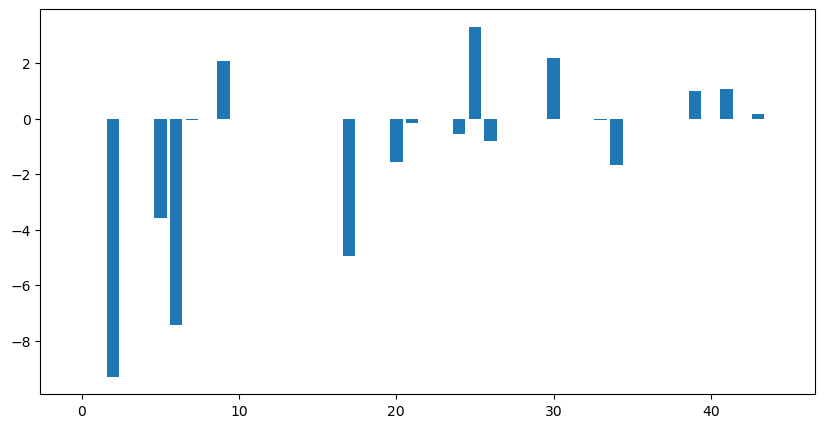

In [257]:
#Lasso regresija

#Inicijalizacija
lasso_model = Lasso(alpha = 1)

#Obuka modela
lasso_model.fit(x_interakcije_train, y_obuka)

#Testiranje
y_predvidjeno = lasso_model.predict(x_interakcije_test)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_interakcije_train.shape[0], x_interakcije_test.shape[1])

#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("Koeficijenti: ", lasso_model.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1456.1507298528195
Srednja apsolutna greška:  25.9323219185951
Koren srednje kvadratne greške:  38.15954310330274
R kvadrat skor:  0.23851300697860967
Prilagođeni R kvadrat skor:  0.2366658169321988
   Prave vrednosti  Predviđene vrednosti
0             8.00                 28.37
1            81.00                 74.64
2            71.00                 30.61
3            49.00                 42.31
4            19.00                 43.27
5            44.00                 28.45
6            33.00                 73.06
7            24.00                 54.37
Koeficijenti:  [-5.07276764e-01  5.49878506e+00 -1.34311267e+01  2.22299750e-01
 -8.49267710e+00 -2.13774257e+00 -1.23167950e+01 -3.96132201e+00
 -9.81461074e+00 -2.22677140e+00  3.93641056e+00  1.24942751e+01
 -6.14889951e+00 -1.70426799e+00 -1.13209334e+01  1.67772007e+00
  2.12062935e-01 -6.00176803e-02  7.38678831e+00 -2.59127784e-01
 -3.04087717e+00 -1.31271909e+00 -5.46490007e+00

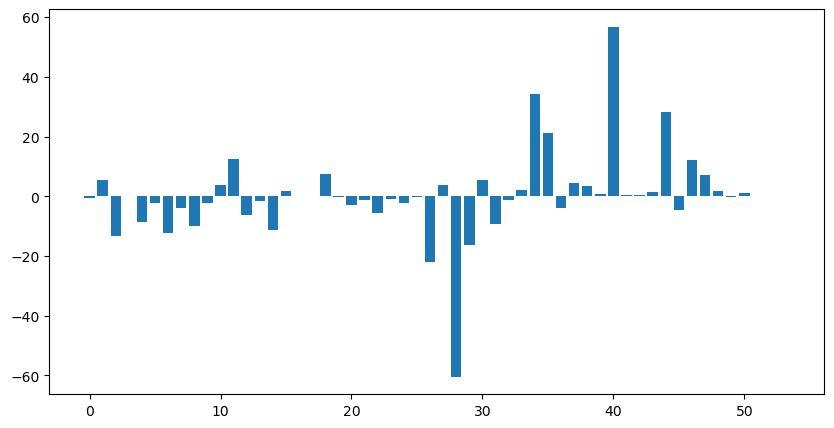

In [258]:
#NAJBOLJI MODEL LINEARNE REGRESIJE
#Ridge regresija
#alfa određuje koliki je uticaj regularizacionog dela

#Inicijalizacija
ridge_model = Ridge(alpha = 1)

#Obuka modela
ridge_model.fit(x_interakcije2_train, y_obuka)

#Testiranje
y_predvidjeno = ridge_model.predict(x_interakcije2_test)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_interakcije2_train.shape[0], x_interakcije2_test.shape[1])


#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("Koeficijenti: ", ridge_model.coef_)

Mere uspešnosti:
Srednja kvadratna greška:  1518.2646041036182
Srednja apsolutna greška:  26.507309962655235
Koren srednje kvadratne greške:  38.9649150403747
R kvadrat skor:  0.2060308563615989
Prilagođeni R kvadrat skor:  0.20410487218494588
   Prave vrednosti  Predviđene vrednosti
0             8.00                 36.48
1            81.00                 69.50
2            71.00                 33.42
3            49.00                 45.11
4            19.00                 44.14
5            44.00                 32.05
6            33.00                 73.57
7            24.00                 62.90
Koeficijenti:  [-0.00000000e+00  1.89790992e+00 -8.48385102e+00 -0.00000000e+00
 -0.00000000e+00 -1.24319192e+00 -9.30439731e+00 -0.00000000e+00
 -0.00000000e+00 -1.12379437e+00  1.88842232e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.49452282e-01
 -0.00000000e+00 -0.00000000e+00  5.43750941e+00 -4.78592038e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+0

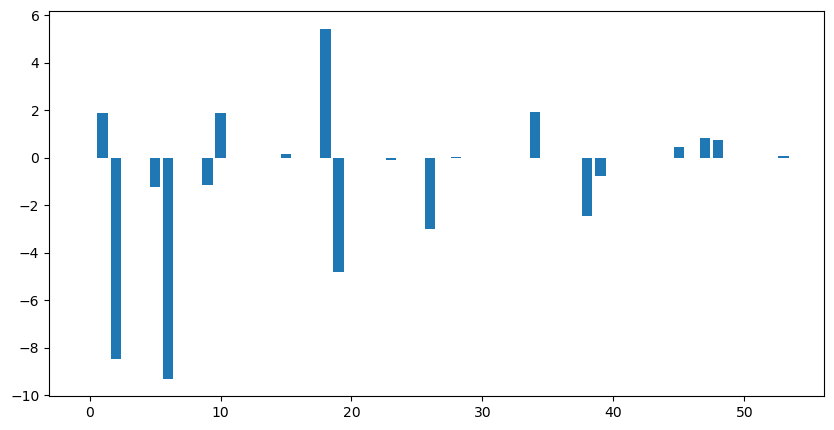

In [259]:
#Lasso regresija

#Inicijalizacija
lasso_model = Lasso(alpha = 1)

#Obuka modela
lasso_model.fit(x_interakcije2_train, y_obuka)

#Testiranje
y_predvidjeno = lasso_model.predict(x_interakcije2_test)

#Evaluacija
evaluacija_modela(y_test, y_predvidjeno, x_interakcije2_train.shape[0], x_interakcije2_test.shape[1])

#Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("Koeficijenti: ", lasso_model.coef_)

In [260]:
#Knn 
#Use .loc[] for label-based indexing
#Use .iloc[] for position-based indexing, and
#df2.loc[df2.loc[:, 'PS_US Post']>20, :]
#df.loc[df['shield'] > 35] = 0


In [261]:
def labele_opasnosti(value):
    #converted_num = int(direction)

    if 0 < value <= 55.4:
            return '1'
    elif 55.4 < value <= 150.5:
            return '2'
    else:
            return '3'


In [262]:
df2['PM_US Post (Opasnost)'] = df2['PM_US Post'].apply(labele_opasnosti)

C:\Users\Svetlana\AppData\Local\Temp\ipykernel_12060\1371086337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PM_US Post (Opasnost)'] = df2['PM_US Post'].apply(labele_opasnosti)


In [263]:
df2.head()

#provera jel valja


,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM_US Post (Opasnost)
17442,17443,2011,12,28,18,4,36.00,4.00,62.00,1027.10,11.00,5,8.00,0.00,0.00,1
17443,17444,2011,12,28,19,4,41.00,4.00,62.00,1027.10,11.00,5,9.00,0.00,0.00,1
17444,17445,2011,12,28,20,4,44.00,5.00,71.07,1028.10,10.00,5,11.00,0.00,0.00,1
17445,17446,2011,12,28,21,4,40.00,5.00,71.07,1028.10,10.00,5,13.00,0.00,0.00,1
17446,17447,2011,12,28,22,4,25.00,6.00,76.18,1028.10,10.00,5,15.00,0.00,0.00,1


In [264]:
def evaluation_classifier(conf_mat):
    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print('precision: ', precision)
    print('accuracy: ', accuracy)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    print('F score: ', F_score)

In [265]:
#X = df2.iloc[:, 1:].copy() # obelezja
#y = df2.iloc[:, 0].copy() # labele

X=df2.iloc[:,:-1]
y = df2.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=11)

print("obuka shape: {}".format(X_train.shape))
print("test shape: {}".format(Y_train.shape))
print("test shape: {}".format(X_test.shape))



obuka shape: (27098, 15)
test shape: (27098,)
test shape: (4782, 15)


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 1  i m = euclidean  tacnost je:  0.9552697616060225  a mat. konf. je:
[[20426.   577.     0.]
 [  670.  8959.    85.]
 [    0.    94.  1069.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 1  i m = hamming  tacnost je:  0.813143036386449  a mat. konf. je:
[[18572.  2279.   152.]
 [ 2641.  6721.   352.]
 [  164.   369.   630.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 2  i m = euclidean  tacnost je:  0.942534504391468  a mat. konf. je:
[[20733.   270.     0.]
 [ 1354.  8321.    39.]
 [    0.   169.   994.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 2  i m = hamming  tacnost je:  0.7999372647427855  a mat. konf. je:
[[2.0097e+04 8.8700e+02 1.9000e+01]
 [4.5470e+03 5.0740e+03 9.3000e+01]
 [3.3800e+02 4.9400e+02 3.3100e+02]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 3  i m = euclidean  tacnost je:  0.9476787954830617  a mat. konf. je:
[[20367.   636.     0.]
 [  848.  8789.    77.]
 [    0.   107.  1056.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 3  i m = hamming  tacnost je:  0.8156838143036387  a mat. konf. je:
[[19083.  1864.    56.]
 [ 3076.  6432.   206.]
 [  295.   379.   489.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 4  i m = euclidean  tacnost je:  0.9403701380175657  a mat. konf. je:
[[20623.   380.     0.]
 [ 1304.  8362.    48.]
 [    0.   169.   994.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 4  i m = hamming  tacnost je:  0.8076537013801757  a mat. konf. je:
[[19880.  1072.    51.]
 [ 4090.  5462.   162.]
 [  254.   503.   406.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 5  i m = euclidean  tacnost je:  0.9421580928481808  a mat. konf. je:
[[20349.   654.     0.]
 [  976.  8660.    78.]
 [    0.   136.  1027.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 5  i m = hamming  tacnost je:  0.8164052697616061  a mat. konf. je:
[[19319.  1646.    38.]
 [ 3282.  6299.   133.]
 [  275.   479.   409.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 6  i m = euclidean  tacnost je:  0.9350062735257214  a mat. konf. je:
[[20554.   449.     0.]
 [ 1382.  8281.    51.]
 [    0.   190.   973.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 6  i m = hamming  tacnost je:  0.8110414052697615  a mat. konf. je:
[[19868.  1099.    36.]
 [ 3980.  5606.   128.]
 [  288.   493.   382.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 7  i m = euclidean  tacnost je:  0.9361982434127979  a mat. konf. je:
[[20305.   698.     0.]
 [ 1100.  8539.    75.]
 [    0.   161.  1002.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 7  i m = hamming  tacnost je:  0.8172835633626099  a mat. konf. je:
[[19450.  1517.    36.]
 [ 3353.  6229.   132.]
 [  266.   521.   376.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 8  i m = euclidean  tacnost je:  0.9316499372647428  a mat. konf. je:
[[20491.   512.     0.]
 [ 1407.  8260.    47.]
 [    0.   213.   950.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 8  i m = hamming  tacnost je:  0.8128920953575911  a mat. konf. je:
[[19821.  1155.    27.]
 [ 3869.  5748.    97.]
 [  289.   528.   346.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 9  i m = euclidean  tacnost je:  0.932340025094103  a mat. konf. je:
[[20277.   726.     0.]
 [ 1178.  8470.    66.]
 [    0.   187.   976.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 9  i m = hamming  tacnost je:  0.8178481806775407  a mat. konf. je:
[[19545.  1428.    30.]
 [ 3443.  6179.    92.]
 [  284.   530.   349.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 10  i m = euclidean  tacnost je:  0.9282308657465496  a mat. konf. je:
[[20442.   561.     0.]
 [ 1450.  8219.    45.]
 [    0.   232.   931.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 10  i m = hamming  tacnost je:  0.8121079046424089  a mat. konf. je:
[[19806.  1174.    23.]
 [ 3861.  5753.   100.]
 [  281.   551.   331.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'Accuracy')

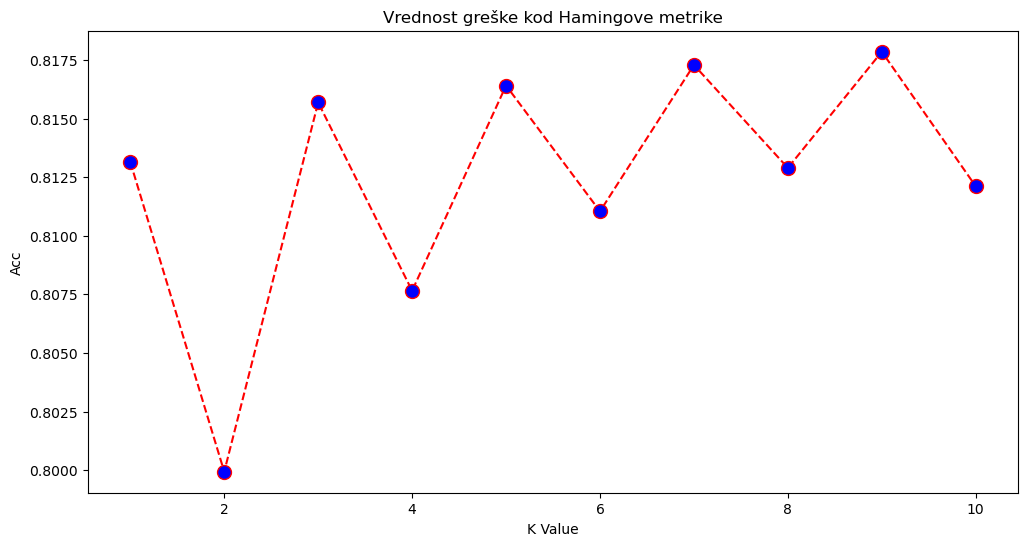

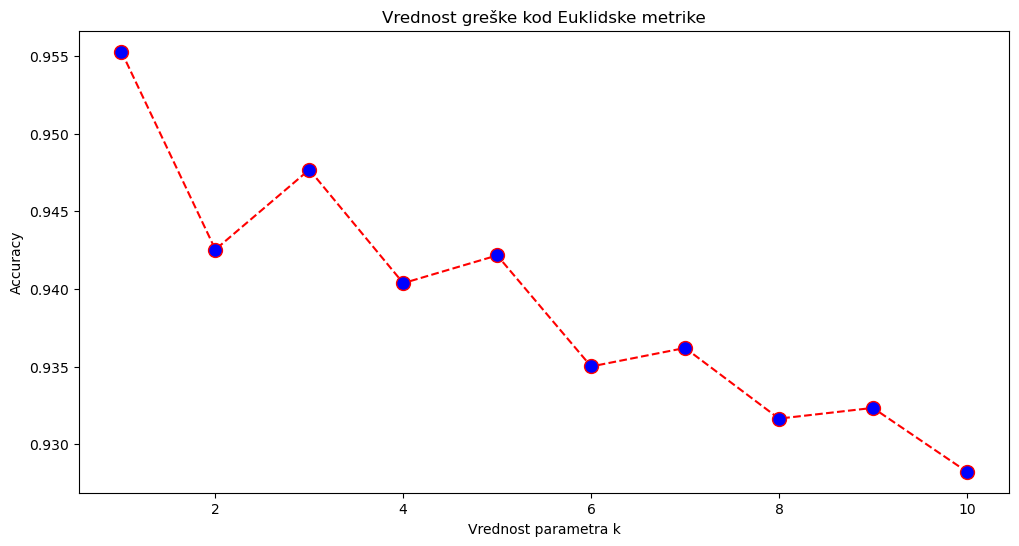

In [266]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#generisanje listi u koje nadovezujem
acc = []
acc_hamming = []
acc_euclidean = []
#testiram na k=10 i euklidskoj kao klasicnoj metrici i hamingovoj 
for k in range(1, 11):
    for m in ['euclidean','hamming']:
        #indeksi koji se uzimaju unutar podeljenih podskupova
        indexes = kf.split(X, y)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
        #kreiram cross valid
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
            y_pred = classifier.predict(X.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y.iloc[test_index], y_pred)
        print('za parametre k=', k, ' i m =', m, ' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        print(fin_conf_mat)
        acc.append(np.mean(acc_tmp))
        if(m == 'hamming'):
            acc_hamming.append(np.mean(acc_tmp))
        if(m == 'euclidean'):
            acc_euclidean.append(np.mean(acc_tmp))

            
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), acc_hamming, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Vrednost greške kod Hamingove metrike')
plt.xlabel('K Value')
plt.ylabel('Acc')

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), acc_euclidean, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Vrednost greške kod Euklidske metrike')
plt.xlabel('Vrednost parametra k')
plt.ylabel('Accuracy')





In [271]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

classifier.fit(X_train, Y_train)

y_pred = classifier.predict(Y_test)
conf_mat = confusion_matrix(Y_test, Y_pred)
evaluation_classifier(conf_mat)

#ovo videh kod nekog indijca, ni to ne radi

print('procenat pogodjenih uzoraka: ', accuracy_score(Y_test, y_pred))
print('preciznost mikro: ', precision_score(Y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(Y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(Y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(Y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(Y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(Y_test, y_pred, average='macro'))


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 1. ... 1. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.